# Bank Loan Term Prediction
---

## Import packages & read data.

In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

# Visualization imports
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# %config InlineBackend.figure_format = 'svg'

# Modeling imports
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, roc_auc_score
from sklearn import linear_model, ensemble , tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , VotingClassifier
from sklearn.linear_model import LogisticRegression
import imblearn.over_sampling
from sklearn.svm import SVC  
from sklearn.utils import class_weight
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm

In [2]:
df = pd.read_csv('credit_train.csv')
df

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(100514, 19)

In [4]:
df.tail()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
100509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.isna().sum()

Loan ID                           514
Customer ID                       514
Loan Status                       514
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64

In [6]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

In [7]:
duplicate = df.duplicated()
print(f'Duplicate in df :', duplicate.sum())

Duplicate in df : 10728


**Rename columns for easer code writing**

In [8]:
df.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Annual Income', 'Years in current job',
       'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [9]:
df.columns = df.columns.str.replace(' ','_')

In [10]:
df.columns

Index(['Loan_ID', 'Customer_ID', 'Loan_Status', 'Current_Loan_Amount', 'Term',
       'Credit_Score', 'Annual_Income', 'Years_in_current_job',
       'Home_Ownership', 'Purpose', 'Monthly_Debt', 'Years_of_Credit_History',
       'Months_since_last_delinquent', 'Number_of_Open_Accounts',
       'Number_of_Credit_Problems', 'Current_Credit_Balance',
       'Maximum_Open_Credit', 'Bankruptcies', 'Tax_Liens'],
      dtype='object')

## Split the data for train, validation and test

In [11]:
# X = df.drop(columns='Term')
# y = pd.DataFrame(df['Term'])

# cross val
df_train, df_test  = train_test_split(df, test_size=0.2, random_state=42)

# # split the data for train and test
# df_Train, df_test = train_test_split(df, test_size = 0.2, random_state = 30 )

# # split the train for train and val
# df_train, df_val = train_test_split(df_Train, test_size = 0.2, random_state = 30 )

In [12]:
print(f'Shape of train:', df_train.shape)
# print(f'Shape of validation:', df_val.shape)
print(f'Shape of test:', df_test.shape)

Shape of train: (80411, 19)
Shape of test: (20103, 19)


## Data Pre-processing

### Cleaning data

In [13]:
# reset index for train
df_train = df_train.reset_index(drop=True)

# # reset index for val
# df_val = df_val.reset_index(drop=True)

# reset index for val
df_test = df_test.reset_index(drop=True)

In [14]:
# dope nulls in Loan_ID

# for train
df_train = df_train.dropna(subset = ['Loan_ID'])

# # for val
# df_val = df_val.dropna(subset = ['Loan_ID'])

# for test
df_test = df_test.dropna(subset = ['Loan_ID'])

In [15]:
print(f'Shape of train:', df_train.shape)
# print(f'Shape of validation:', df_val.shape)
print(f'Shape of test:', df_test.shape)

Shape of train: (79992, 19)
Shape of test: (20008, 19)


In [16]:
df_train.sample(20)

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
10909,3dfc88bc-d113-4131-8c03-f148ee9f1a71,6761aeeb-506c-4418-a593-23191f7416c5,Fully Paid,88396.0,Short Term,741.0,1068788.0,10+ years,Home Mortgage,Other,27164.87,27.3,6.0,12.0,0.0,572983.0,896566.0,0.0,0.0
34295,0aa29e55-082f-4c8b-87f9-394d8ca367c2,589f2844-1761-44ac-b6aa-b191da05b13d,Fully Paid,109846.0,Short Term,714.0,853727.0,3 years,Rent,Home Improvements,13161.49,7.4,38.0,9.0,0.0,113354.0,296296.0,0.0,0.0
14076,b452957e-38b6-4316-b2fe-7dae5cb2383b,61bb19cd-a089-4be8-ae7f-7becc7a98da5,Fully Paid,248336.0,Short Term,710.0,643872.0,4 years,Rent,Debt Consolidation,6063.09,16.9,72.0,5.0,0.0,124013.0,250162.0,0.0,0.0
65724,cb1ee7df-1fdc-43c6-81bd-27ef52361830,7c494f36-9fbc-44a6-9c65-df53fecf714b,Fully Paid,99999999.0,Short Term,719.0,1300075.0,10+ years,Home Mortgage,Debt Consolidation,29685.03,24.9,NaN,9.0,0.0,1061093.0,1350118.0,0.0,0.0
24458,5e48ff02-5f7c-47cf-acc3-160f0b71d008,dae190eb-1c33-4458-b34d-c14d915ab118,Fully Paid,99999999.0,Short Term,733.0,1383599.0,10+ years,Rent,Debt Consolidation,22944.59,17.0,17.0,9.0,0.0,108661.0,149072.0,0.0,0.0
30888,c6db1fb1-07e5-4344-b133-7f89b8e2db76,a7a39e71-fe4e-4509-8c85-9bb922b96c1c,Fully Paid,174108.0,Short Term,711.0,699162.0,8 years,Rent,Debt Consolidation,2219.77,26.6,70.0,6.0,1.0,84303.0,200420.0,1.0,0.0
2548,093520ba-530b-470d-af15-98ea24b406ca,b5caf7a4-a649-4908-adc4-3c49ba5d4b31,Fully Paid,264902.0,Short Term,739.0,1239199.0,6 years,Rent,Debt Consolidation,14664.01,16.1,NaN,13.0,0.0,464778.0,1228678.0,0.0,0.0
42046,4e43f360-6056-4441-bdf3-0606350ebf95,deb99a73-c867-4e56-b710-c8aa8ebcd328,Fully Paid,301686.0,Short Term,742.0,1042188.0,2 years,Rent,Buy House,22407.08,12.3,NaN,14.0,0.0,272080.0,1438558.0,0.0,0.0
72083,f91c77c6-18c4-4704-acde-ed7107d0ab37,17109c2b-7277-4e05-9954-e54b45556013,Fully Paid,99999999.0,Short Term,745.0,829635.0,7 years,Home Mortgage,Debt Consolidation,4120.53,11.1,NaN,8.0,0.0,122702.0,180510.0,0.0,0.0
61876,fe6e205c-74c2-40e7-be9c-4673fdf0b0dc,9b9a4651-0581-4b9d-8287-ef8c43bbbeb0,Charged Off,129448.0,Long Term,7340.0,1211174.0,3 years,Rent,other,14634.94,16.1,14.0,12.0,0.0,183046.0,474188.0,0.0,0.0


In [17]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79992 entries, 0 to 80410
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan_ID                       79992 non-null  object 
 1   Customer_ID                   79992 non-null  object 
 2   Loan_Status                   79992 non-null  object 
 3   Current_Loan_Amount           79992 non-null  float64
 4   Term                          79992 non-null  object 
 5   Credit_Score                  64536 non-null  float64
 6   Annual_Income                 64536 non-null  float64
 7   Years_in_current_job          76606 non-null  object 
 8   Home_Ownership                79992 non-null  object 
 9   Purpose                       79992 non-null  object 
 10  Monthly_Debt                  79992 non-null  float64
 11  Years_of_Credit_History       79992 non-null  float64
 12  Months_since_last_delinquent  37455 non-null  float64
 13  N

In [18]:
df_train.isna().sum()

Loan_ID                             0
Customer_ID                         0
Loan_Status                         0
Current_Loan_Amount                 0
Term                                0
Credit_Score                    15456
Annual_Income                   15456
Years_in_current_job             3386
Home_Ownership                      0
Purpose                             0
Monthly_Debt                        0
Years_of_Credit_History             0
Months_since_last_delinquent    42537
Number_of_Open_Accounts             0
Number_of_Credit_Problems           0
Current_Credit_Balance              0
Maximum_Open_Credit                 2
Bankruptcies                      150
Tax_Liens                           5
dtype: int64

In [19]:
# check for dublicate

# for train
duplicate = df_train.duplicated()
print(f'Duplicate in train :', duplicate.sum())

# # for val
# duplicate = df_val.duplicated()
# print(f'Duplicate in validation :', duplicate.sum())

# for test
duplicate = df_test.duplicated()
print(f'Duplicate in test :', duplicate.sum())
print(f'Shape of train:', df_train.shape)
# print(f'Shape of validation:', df_val.shape)
print(f'Shape of test:', df_test.shape)

Duplicate in train : 6520
Duplicate in test : 401
Shape of train: (79992, 19)
Shape of test: (20008, 19)


In [20]:
# drop duplicates rows
# train
df_train.drop_duplicates(inplace=True)

# val
# df_val.drop_duplicates(inplace=True)

# test
df_test.drop_duplicates(inplace=True)

In [21]:
# check for dublicate

# for train
duplicate = df_train.duplicated()
print(f'Duplicate in train :', duplicate.sum())

# # for val
# duplicate = df_val.duplicated()
# print(f'Duplicate in validation :', duplicate.sum())

# for test
duplicate = df_test.duplicated()
print(f'Duplicate in test :', duplicate.sum())
print(f'Shape of train:', df_train.shape)
# print(f'Shape of validation:', df_val.shape)
print(f'Shape of test:', df_test.shape)

Duplicate in train : 0
Duplicate in test : 0
Shape of train: (73472, 19)
Shape of test: (19607, 19)


**Duplicate in Loan ID**

In [22]:
df_train['Loan_ID'].value_counts().sort_values(ascending=False)

791599dd-9c7b-4f9b-b41b-c211d4c55e56    2
c9acf295-ae0c-4ac5-9ea0-f42bacb2055c    2
32d838e6-125d-4126-8a2a-86c7eee2c8e3    2
9efdaa1c-270d-4b55-b142-94189a1fb351    2
1bbaffc6-c757-4ea0-932a-131e690d9cae    2
                                       ..
83d07d32-047b-42b5-896f-496bb8710e26    1
1af65a97-17d8-432f-b8b4-17096aa50511    1
0c9c9171-38cd-4215-b833-04c2702ac12b    1
a6737bd4-ff1f-4a26-bfec-674c746be9ac    1
2a120c79-6dc8-4ced-b3bf-3bd6b31ebbec    1
Name: Loan_ID, Length: 68478, dtype: int64

In [23]:
df_train[df_train.Loan_ID.duplicated()]

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
616,ccb4bff4-4103-4220-bd6a-7cf8d97660f2,f7ad2ea9-c1a2-4020-8db9-d1ce98dd9cac,Fully Paid,215512.0,Short Term,716.0,1302868.0,7 years,Rent,Debt Consolidation,5830.34,13.8,NaN,6.0,0.0,84284.0,325270.0,0.0,0.0
625,cb1970cb-57d1-4d98-9889-c95b36e4c72a,9a4fded3-a8a1-42e2-b10e-31ce3925e444,Fully Paid,357808.0,Long Term,671.0,1158810.0,2 years,Home Mortgage,Debt Consolidation,29260.00,12.5,1.0,27.0,0.0,331759.0,1401994.0,0.0,0.0
981,6c36c90c-da96-42cf-b46d-81f50ec470f3,8a4d6d5b-69e0-4bde-afb2-cc1d3e8b831f,Fully Paid,456786.0,Long Term,700.0,1327606.0,1 year,Rent,Debt Consolidation,3186.30,15.2,51.0,5.0,0.0,105355.0,153626.0,0.0,0.0
1047,58d48443-93b1-4443-bd65-3ecd0fbbf9f7,d5d43933-bf2d-4b95-87e9-7b743568b618,Fully Paid,543290.0,Long Term,699.0,1370071.0,10+ years,Rent,Debt Consolidation,11017.72,14.1,NaN,8.0,0.0,340404.0,532620.0,0.0,0.0
1131,f001953b-a5e1-4668-8fc1-d8df1a9e72c0,702e5fcc-00bf-4722-8f3e-9b16b211e8de,Fully Paid,99999999.0,Long Term,688.0,674975.0,5 years,Rent,Business Loan,5495.37,14.7,45.0,12.0,0.0,157453.0,415316.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80372,abfdae7a-3bda-42db-ba79-4b9c059764bb,0a6c36c7-001d-4d98-9f35-26e0365228fa,Fully Paid,429088.0,Long Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,27129.34,12.3,NaN,13.0,0.0,351329.0,605352.0,0.0,0.0
80376,f35b054f-30c1-4e13-af01-685db773770f,3a42402c-3996-4021-a935-185eb1754fb1,Fully Paid,207086.0,Short Term,723.0,1645457.0,10+ years,Rent,other,34143.00,19.8,10.0,11.0,0.0,232218.0,321244.0,0.0,0.0
80378,47f27c67-3199-4aa4-a700-826e4a4b922c,d2b60744-df1a-4e25-a2f0-5ae12e6d31aa,Fully Paid,546260.0,Long Term,725.0,1698372.0,10+ years,Rent,Debt Consolidation,21512.75,17.5,12.0,19.0,0.0,88787.0,1606352.0,0.0,0.0
80389,5f51b043-e1cb-4022-8085-1aed0142d5f0,8a187950-2cc1-470b-852e-d32e13cb49af,Fully Paid,99242.0,Short Term,703.0,666596.0,3 years,Own Home,Debt Consolidation,9110.12,9.1,18.0,9.0,0.0,126882.0,282546.0,0.0,0.0


In [24]:
df_train[df_train['Loan_ID'] == '7830a00a-20c4-4480-9cf0-fe2f86b5266b']

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
31727,7830a00a-20c4-4480-9cf0-fe2f86b5266b,f41798de-03d5-4c73-aa4d-1483774aa739,Fully Paid,99999999.0,Short Term,653.0,1314572.0,4 years,Rent,Debt Consolidation,13145.72,7.2,NaN,9.0,0.0,217132.0,323158.0,0.0,0.0


In [25]:
df_train[df_train['Loan_ID'] == '5a90cbe3-8fee-4582-8823-1f31546dec6e']

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
55542,5a90cbe3-8fee-4582-8823-1f31546dec6e,f4d96397-d6d6-409e-8f32-99ad82046ef2,Fully Paid,428868.0,Long Term,678.0,1133844.0,10+ years,Home Mortgage,Debt Consolidation,24377.57,21.1,NaN,20.0,1.0,446291.0,1210220.0,1.0,0.0
79840,5a90cbe3-8fee-4582-8823-1f31546dec6e,f4d96397-d6d6-409e-8f32-99ad82046ef2,Fully Paid,428868.0,Long Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,24377.57,21.1,NaN,20.0,1.0,446291.0,1210220.0,1.0,0.0


We can see an error in data entry. There is a duplicate in loan ID but the difference in current loan amount or null values,

**Now we fix it.**

In [26]:
df_train[(df_train.Loan_ID.duplicated() & (df_train['Current_Loan_Amount'] == 99999999.0))]

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
1131,f001953b-a5e1-4668-8fc1-d8df1a9e72c0,702e5fcc-00bf-4722-8f3e-9b16b211e8de,Fully Paid,99999999.0,Long Term,688.0,674975.0,5 years,Rent,Business Loan,5495.37,14.7,45.0,12.0,0.0,157453.0,415316.0,0.0,0.0
2357,d3de2f28-3759-4453-a2d4-dd0f0dfed25f,b3110f03-0c03-45f5-9ca6-e368a1d39f40,Fully Paid,99999999.0,Long Term,696.0,851846.0,9 years,Own Home,Debt Consolidation,10647.98,9.5,NaN,8.0,0.0,129219.0,487366.0,0.0,0.0
4416,15a35601-a5b8-4f53-aaeb-e89bd9838f9b,a147b553-a0f1-4773-910d-9b1af0052324,Fully Paid,99999999.0,Long Term,667.0,1412897.0,10+ years,Rent,Debt Consolidation,36970.58,22.7,60.0,12.0,0.0,315248.0,651816.0,0.0,0.0
4647,ea0e3c8d-0a6b-4b03-a766-c310c5a22cd6,e25e2a25-19db-4100-97fc-18282b8c98a0,Fully Paid,99999999.0,Short Term,721.0,805733.0,10+ years,Home Mortgage,Debt Consolidation,12757.55,15.9,45.0,9.0,0.0,93347.0,195448.0,0.0,0.0
4714,adebe0c9-c9d5-44fa-b70e-a827e2100415,2c2a199f-48b3-4b9b-91b4-e013dc45503c,Fully Paid,99999999.0,Long Term,678.0,1606279.0,< 1 year,Home Mortgage,Debt Consolidation,14858.00,29.5,23.0,20.0,1.0,203205.0,312884.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80151,cc537c28-c1ce-4b20-97fc-7947067688dd,e2293f56-2414-49dc-9bd7-5fbb2d64d385,Fully Paid,99999999.0,Long Term,722.0,1248186.0,8 years,Home Mortgage,Debt Consolidation,13729.97,17.5,NaN,8.0,0.0,526376.0,731698.0,0.0,0.0
80202,fc1deea3-945e-4ed4-acf7-71751b01797b,64577063-c0ec-4273-acab-e55105467aae,Fully Paid,99999999.0,Long Term,723.0,2412696.0,7 years,Home Mortgage,Debt Consolidation,12425.43,28.0,NaN,11.0,0.0,367897.0,777348.0,0.0,0.0
80244,35a73834-a7d1-47ae-9193-8f5da7f7f43b,a35a43a7-67dd-4989-a707-a389b6614beb,Fully Paid,99999999.0,Long Term,670.0,5225931.0,5 years,Rent,Debt Consolidation,18813.42,23.7,37.0,13.0,0.0,742596.0,1682692.0,0.0,0.0
80287,802d1d90-a269-4fdc-9697-1bec09c94128,a34e5841-7dad-4ec2-ac11-337cdc831782,Fully Paid,99999999.0,Short Term,683.0,843372.0,3 years,Home Mortgage,Debt Consolidation,13283.09,12.9,NaN,12.0,0.0,534508.0,724724.0,0.0,0.0


In [27]:
# drop duplicate in Loan_ID and Current_Loan_Amount = 99999999.0

# for train
df_train = df_train[~(df_train.Loan_ID.duplicated() & (df_train['Current_Loan_Amount'] == 99999999.0))]

# for val
# df_val = df_val[~(df_val.Loan_ID.duplicated() & (df_val['Current_Loan_Amount'] == 99999999.0))]

# for test
df_test = df_test[~(df_test.Loan_ID.duplicated() & (df_test['Current_Loan_Amount'] == 99999999.0))]

In [28]:
df_train[(df_train.Loan_ID.duplicated())]

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
616,ccb4bff4-4103-4220-bd6a-7cf8d97660f2,f7ad2ea9-c1a2-4020-8db9-d1ce98dd9cac,Fully Paid,215512.0,Short Term,716.0,1302868.0,7 years,Rent,Debt Consolidation,5830.34,13.8,NaN,6.0,0.0,84284.0,325270.0,0.0,0.0
625,cb1970cb-57d1-4d98-9889-c95b36e4c72a,9a4fded3-a8a1-42e2-b10e-31ce3925e444,Fully Paid,357808.0,Long Term,671.0,1158810.0,2 years,Home Mortgage,Debt Consolidation,29260.00,12.5,1.0,27.0,0.0,331759.0,1401994.0,0.0,0.0
981,6c36c90c-da96-42cf-b46d-81f50ec470f3,8a4d6d5b-69e0-4bde-afb2-cc1d3e8b831f,Fully Paid,456786.0,Long Term,700.0,1327606.0,1 year,Rent,Debt Consolidation,3186.30,15.2,51.0,5.0,0.0,105355.0,153626.0,0.0,0.0
1047,58d48443-93b1-4443-bd65-3ecd0fbbf9f7,d5d43933-bf2d-4b95-87e9-7b743568b618,Fully Paid,543290.0,Long Term,699.0,1370071.0,10+ years,Rent,Debt Consolidation,11017.72,14.1,NaN,8.0,0.0,340404.0,532620.0,0.0,0.0
1846,02287061-2f82-4870-a84f-7895ae1ad907,2a74c9b8-d631-46b4-aa2d-7b8b8b668034,Fully Paid,324148.0,Short Term,NaN,NaN,2 years,Own Home,Debt Consolidation,16480.98,5.7,NaN,14.0,0.0,22819.0,911284.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80372,abfdae7a-3bda-42db-ba79-4b9c059764bb,0a6c36c7-001d-4d98-9f35-26e0365228fa,Fully Paid,429088.0,Long Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,27129.34,12.3,NaN,13.0,0.0,351329.0,605352.0,0.0,0.0
80376,f35b054f-30c1-4e13-af01-685db773770f,3a42402c-3996-4021-a935-185eb1754fb1,Fully Paid,207086.0,Short Term,723.0,1645457.0,10+ years,Rent,other,34143.00,19.8,10.0,11.0,0.0,232218.0,321244.0,0.0,0.0
80378,47f27c67-3199-4aa4-a700-826e4a4b922c,d2b60744-df1a-4e25-a2f0-5ae12e6d31aa,Fully Paid,546260.0,Long Term,725.0,1698372.0,10+ years,Rent,Debt Consolidation,21512.75,17.5,12.0,19.0,0.0,88787.0,1606352.0,0.0,0.0
80389,5f51b043-e1cb-4022-8085-1aed0142d5f0,8a187950-2cc1-470b-852e-d32e13cb49af,Fully Paid,99242.0,Short Term,703.0,666596.0,3 years,Own Home,Debt Consolidation,9110.12,9.1,18.0,9.0,0.0,126882.0,282546.0,0.0,0.0


In [29]:
df_train[df_train['Loan_ID'] == 'ff486b10-f97d-4dff-bb98-436ef48d8ab1']

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
79511,ff486b10-f97d-4dff-bb98-436ef48d8ab1,f7a4636c-5a93-4723-8d43-8807cf6b57ea,Fully Paid,457292.0,Long Term,NaN,NaN,1 year,Home Mortgage,Debt Consolidation,36053.07,15.9,16.0,19.0,0.0,594206.0,764478.0,0.0,0.0


In [30]:
# dope nulls in Loan_Status

# for train
df_train = df_train.dropna(subset = ['Annual_Income'])

# # for val
# df_val = df_val.dropna(subset = ['Annual_Income'])

# for test
df_test = df_test.dropna(subset = ['Annual_Income'])

In [31]:
df_train[df_train['Loan_ID'] == 'ff486b10-f97d-4dff-bb98-436ef48d8ab1']

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens


In [32]:
#df_train
df_train.Purpose.unique()
# #df_val
# df_val.Purpose.unique()
#da_test
df_test.Purpose.unique()

array(['Home Improvements', 'Debt Consolidation', 'Buy a Car', 'other',
       'small_business', 'Other', 'Business Loan', 'Buy House',
       'Medical Bills', 'moving', 'Take a Trip', 'wedding',
       'major_purchase', 'Educational Expenses', 'vacation',
       'renewable_energy'], dtype=object)

In [33]:
df_train.Purpose.value_counts()

Debt Consolidation      44775
Home Improvements        3373
other                    3369
Other                    1813
Business Loan             867
Buy a Car                 741
Medical Bills             626
Buy House                 381
Take a Trip               307
major_purchase            209
small_business            160
moving                     82
wedding                    66
Educational Expenses       56
vacation                   47
renewable_energy            6
Name: Purpose, dtype: int64

In [34]:
#df_train
df_train.Purpose = df_train.Purpose.str.replace('other','Other')
# #df_val
# df_val.Purpose = df_val.Purpose.str.replace('other','Other')
#df_test
df_test.Purpose = df_test.Purpose.str.replace('other','Other')

In [35]:
df_train.Purpose.value_counts()

Debt Consolidation      44775
Other                    5182
Home Improvements        3373
Business Loan             867
Buy a Car                 741
Medical Bills             626
Buy House                 381
Take a Trip               307
major_purchase            209
small_business            160
moving                     82
wedding                    66
Educational Expenses       56
vacation                   47
renewable_energy            6
Name: Purpose, dtype: int64

In [36]:
df_train.Purpose.unique()

array(['Debt Consolidation', 'Buy House', 'Home Improvements', 'Other',
       'Business Loan', 'small_business', 'Take a Trip', 'Buy a Car',
       'Medical Bills', 'major_purchase', 'moving', 'wedding',
       'Educational Expenses', 'renewable_energy', 'vacation'],
      dtype=object)

In [37]:
df_train.isnull().sum() # train

Loan_ID                             0
Customer_ID                         0
Loan_Status                         0
Current_Loan_Amount                 0
Term                                0
Credit_Score                        0
Annual_Income                       0
Years_in_current_job             2416
Home_Ownership                      0
Purpose                             0
Monthly_Debt                        0
Years_of_Credit_History             0
Months_since_last_delinquent    30431
Number_of_Open_Accounts             0
Number_of_Credit_Problems           0
Current_Credit_Balance              0
Maximum_Open_Credit                 1
Bankruptcies                      112
Tax_Liens                           3
dtype: int64

In [38]:
# dope duplicated in Loan_ID

# for train
df_train = df_train.drop_duplicates(subset = ['Loan_ID'])

# # for val
# df_val = df_val.drop_duplicates(subset = ['Loan_ID'])

# for test
df_test = df_test.drop_duplicates(subset = ['Loan_ID'])

In [39]:
df_train.isnull().sum() # train

Loan_ID                             0
Customer_ID                         0
Loan_Status                         0
Current_Loan_Amount                 0
Term                                0
Credit_Score                        0
Annual_Income                       0
Years_in_current_job             2368
Home_Ownership                      0
Purpose                             0
Monthly_Debt                        0
Years_of_Credit_History             0
Months_since_last_delinquent    29853
Number_of_Open_Accounts             0
Number_of_Credit_Problems           0
Current_Credit_Balance              0
Maximum_Open_Credit                 1
Bankruptcies                      109
Tax_Liens                           3
dtype: int64

In [40]:
print(f'Shape of train:', df_train.shape)
# print(f'Shape of validation:', df_val.shape)
print(f'Shape of test:', df_test.shape)

Shape of train: (55718, 19)
Shape of test: (15750, 19)


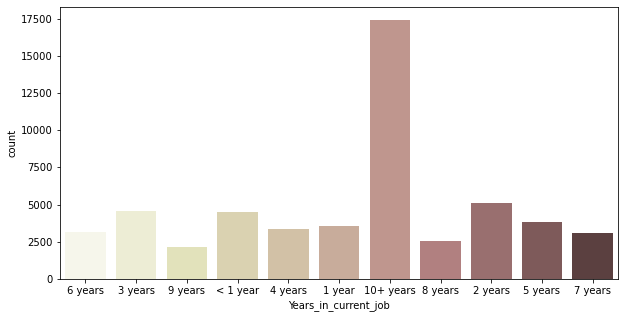

In [41]:
plt.figure(figsize=(10,5))
sns.countplot(df_train['Years_in_current_job'], palette='pink_r');

In [42]:
# fill nulls in Years_in_current_job 

# for train
df_train['Years_in_current_job'] = df_train['Years_in_current_job'].fillna('10+ years')

# # for val
# df_val['Years_in_current_job'] = df_val['Years_in_current_job'].fillna('10+ years')

# for test
df_test['Years_in_current_job'] = df_test['Years_in_current_job'].fillna('10+ years')

In [43]:
# drop Months_since_last_delinquent bc the null > 50&

# train
df_train = df_train.drop(columns='Months_since_last_delinquent')

# test
df_test = df_test.drop(columns='Months_since_last_delinquent')

In [44]:
df_train.isnull().sum()

Loan_ID                        0
Customer_ID                    0
Loan_Status                    0
Current_Loan_Amount            0
Term                           0
Credit_Score                   0
Annual_Income                  0
Years_in_current_job           0
Home_Ownership                 0
Purpose                        0
Monthly_Debt                   0
Years_of_Credit_History        0
Number_of_Open_Accounts        0
Number_of_Credit_Problems      0
Current_Credit_Balance         0
Maximum_Open_Credit            1
Bankruptcies                 109
Tax_Liens                      3
dtype: int64

In [45]:
# drop nulls 

# for train
df_train = df_train.dropna()

# # for val
# df_val = df_val.dropna()

# for test
df_test = df_test.dropna()

In [46]:
df_train.isnull().sum()

Loan_ID                      0
Customer_ID                  0
Loan_Status                  0
Current_Loan_Amount          0
Term                         0
Credit_Score                 0
Annual_Income                0
Years_in_current_job         0
Home_Ownership               0
Purpose                      0
Monthly_Debt                 0
Years_of_Credit_History      0
Number_of_Open_Accounts      0
Number_of_Credit_Problems    0
Current_Credit_Balance       0
Maximum_Open_Credit          0
Bankruptcies                 0
Tax_Liens                    0
dtype: int64

In [47]:
df_train.duplicated().sum()

0

## Feature Engneering
---

In [48]:
df_train.isnull().sum()

Loan_ID                      0
Customer_ID                  0
Loan_Status                  0
Current_Loan_Amount          0
Term                         0
Credit_Score                 0
Annual_Income                0
Years_in_current_job         0
Home_Ownership               0
Purpose                      0
Monthly_Debt                 0
Years_of_Credit_History      0
Number_of_Open_Accounts      0
Number_of_Credit_Problems    0
Current_Credit_Balance       0
Maximum_Open_Credit          0
Bankruptcies                 0
Tax_Liens                    0
dtype: int64

In [49]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55608 entries, 0 to 80409
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Loan_ID                    55608 non-null  object 
 1   Customer_ID                55608 non-null  object 
 2   Loan_Status                55608 non-null  object 
 3   Current_Loan_Amount        55608 non-null  float64
 4   Term                       55608 non-null  object 
 5   Credit_Score               55608 non-null  float64
 6   Annual_Income              55608 non-null  float64
 7   Years_in_current_job       55608 non-null  object 
 8   Home_Ownership             55608 non-null  object 
 9   Purpose                    55608 non-null  object 
 10  Monthly_Debt               55608 non-null  float64
 11  Years_of_Credit_History    55608 non-null  float64
 12  Number_of_Open_Accounts    55608 non-null  float64
 13  Number_of_Credit_Problems  55608 non-null  flo

### Get Dummies

In [50]:
# train
bank_lone_train = pd.get_dummies(df_train, columns =['Term','Home_Ownership','Purpose','Loan_Status', 'Years_in_current_job'], drop_first=True) ###

# # val
# bank_lone_val = pd.get_dummies(df_val, columns =['Term','Home_Ownership','Purpose','Loan_Status', 'Years_in_current_job'], drop_first=True) ###

# test
bank_lone_test = pd.get_dummies(df_test, columns =['Term','Home_Ownership','Purpose','Loan_Status' , 'Years_in_current_job'], drop_first=True) ###

In [51]:
bank_lone_train.columns

Index(['Loan_ID', 'Customer_ID', 'Current_Loan_Amount', 'Credit_Score',
       'Annual_Income', 'Monthly_Debt', 'Years_of_Credit_History',
       'Number_of_Open_Accounts', 'Number_of_Credit_Problems',
       'Current_Credit_Balance', 'Maximum_Open_Credit', 'Bankruptcies',
       'Tax_Liens', 'Term_Short Term', 'Home_Ownership_Home Mortgage',
       'Home_Ownership_Own Home', 'Home_Ownership_Rent', 'Purpose_Buy House',
       'Purpose_Buy a Car', 'Purpose_Debt Consolidation',
       'Purpose_Educational Expenses', 'Purpose_Home Improvements',
       'Purpose_Medical Bills', 'Purpose_Other', 'Purpose_Take a Trip',
       'Purpose_major_purchase', 'Purpose_moving', 'Purpose_renewable_energy',
       'Purpose_small_business', 'Purpose_vacation', 'Purpose_wedding',
       'Loan_Status_Fully Paid', 'Years_in_current_job_10+ years',
       'Years_in_current_job_2 years', 'Years_in_current_job_3 years',
       'Years_in_current_job_4 years', 'Years_in_current_job_5 years',
       'Years_in_cu

In [52]:
df_train.corr()

,Current_Loan_Amount,Credit_Score,Annual_Income,Monthly_Debt,Years_of_Credit_History,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
Current_Loan_Amount,1.000000,-0.105117,0.015514,-0.008151,0.026922,0.001346,-0.004906,0.006711,-0.000827,-0.001934,-0.002628
Credit_Score,-0.105117,1.000000,-0.014864,-0.000472,-0.013054,0.006577,0.000285,-0.003221,-0.003941,-0.003473,0.006607
Annual_Income,0.015514,-0.014864,1.000000,0.459476,0.148069,0.137162,-0.014591,0.304946,0.042415,-0.045649,0.040754
Monthly_Debt,-0.008151,-0.000472,0.459476,1.000000,0.194691,0.407775,-0.051059,0.484890,0.041829,-0.076626,0.021754
Years_of_Credit_History,0.026922,-0.013054,0.148069,0.194691,1.000000,0.131483,0.058908,0.210841,0.029104,0.061631,0.017174
Number_of_Open_Accounts,0.001346,0.006577,0.137162,0.407775,0.131483,1.000000,-0.014407,0.234957,0.033140,-0.025860,0.007073
Number_of_Credit_Problems,-0.004906,0.000285,-0.014591,-0.051059,0.058908,-0.014407,1.000000,-0.110801,-0.011297,0.749409,0.589154
Current_Credit_Balance,0.006711,-0.003221,0.304946,0.484890,0.210841,0.234957,-0.110801,1.000000,0.136300,-0.124809,-0.011894
Maximum_Open_Credit,-0.000827,-0.003941,0.042415,0.041829,0.029104,0.033140,-0.011297,0.136300,1.000000,-0.015012,-0.000835
Bankruptcies,-0.001934,-0.003473,-0.045649,-0.076626,0.061631,-0.025860,0.749409,-0.124809,-0.015012,1.000000,0.041065


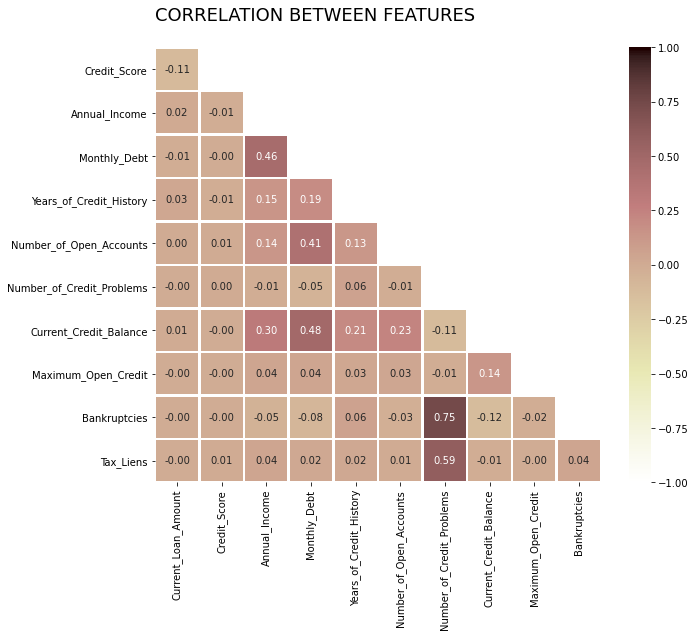

In [53]:
plt.figure(figsize=(10,8))

# corr
data_corr = df_train.corr()
# data_corr = bank_lone_train.corr()

# mask
mask = np.triu(np.ones_like(data_corr, dtype=np.bool))

# adjust mask and df
mask = mask[1:, :-1]
corr = data_corr.iloc[1:,:-1].copy()

sns.heatmap(corr, cmap = 'pink_r', annot = True, vmin= -1, vmax= 1, linewidths=1.5, fmt='.2f', mask=mask);
plt.title('CORRELATION BETWEEN FEATURES\n', loc='left', fontsize=18);
# plt.savefig('plot13.png', dpi = 300, bbox_inches = 'tight');

In [54]:
# sns.pairplot(bank_lone_train, hue = 'Term_Short Term', palette = 'pink_r');

## Visualize data
___

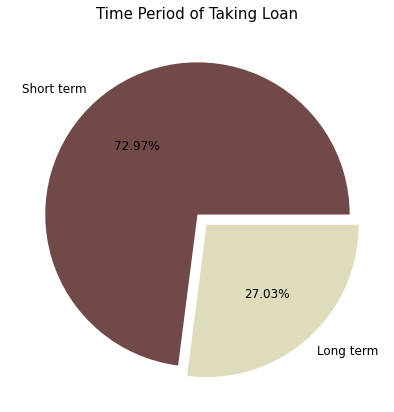

In [55]:
c = ['#724949','#cfa691', '#120f0f', '#a06868']
plt.figure(figsize=(7,7))
plt.pie(x = bank_lone_train['Term_Short Term'].value_counts(),
        labels=['Short term','Long term'],autopct='%.2f%%',
        textprops={'fontsize': 12},explode=[0,0.09], colors = ['#724949','#DEDCBB'])
plt.title('Time Period of Taking Loan',fontdict={'fontsize':15});

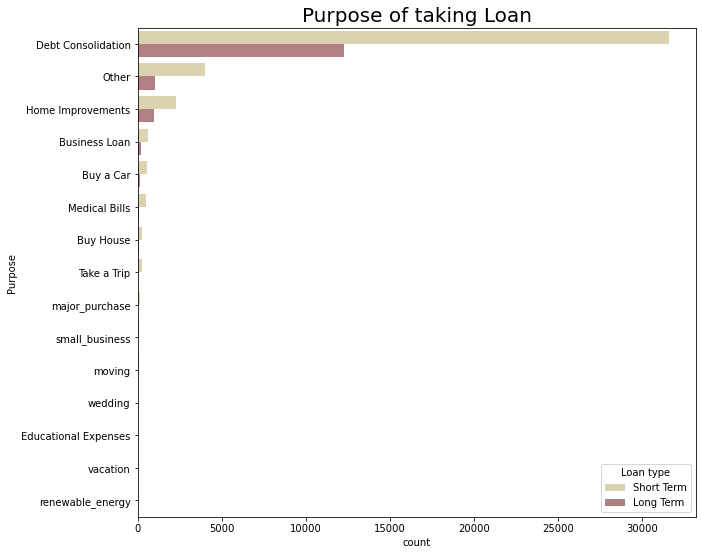

In [56]:
plt.figure(figsize=(10,9))
sns.countplot(y='Purpose' , data=df_train, order = df_train['Purpose'].value_counts().index,
              hue='Term', palette = 'pink_r')
plt.title('Purpose of taking Loan' , fontdict={'fontsize':20})
plt.legend(title="Loan type", loc="lower right");

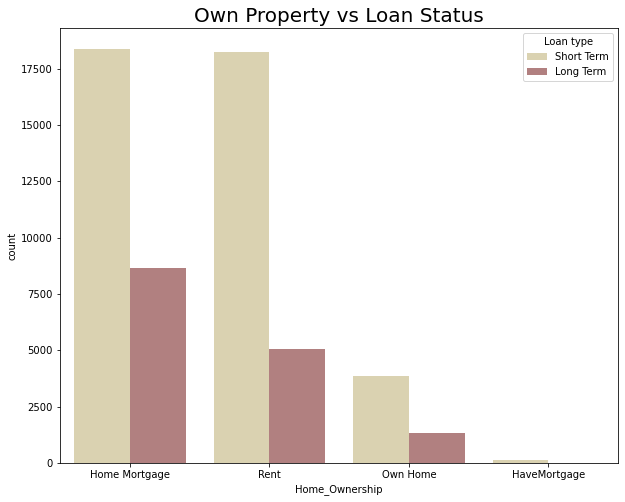

In [57]:
plt.figure(figsize=(10,8))
sns.countplot(x='Home_Ownership',data=df_train ,order = df_train['Home_Ownership'].value_counts().index
              ,hue='Term',  palette = 'pink_r')
plt.title('Own Property vs Loan Status',fontdict={'fontsize':20})
plt.legend(title="Loan type", loc="upper right", labels=["Short Term","Long Term"]);

### Droping outliers

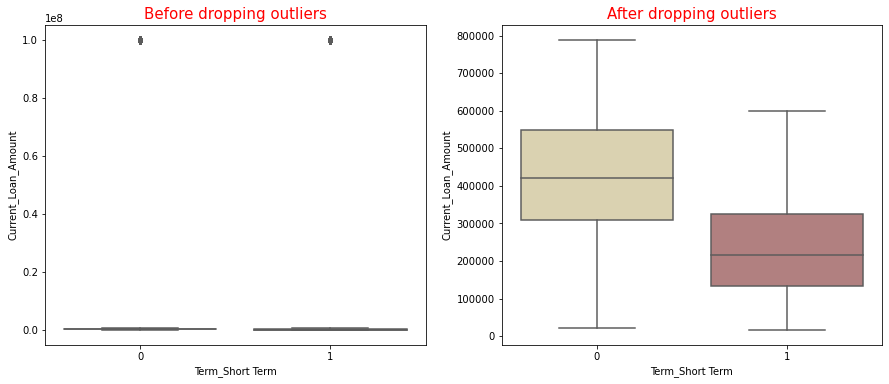

In [58]:
plt.figure(figsize = [15,20])
plt.subplot(3,2,1)
sns.boxplot(x='Term_Short Term',y='Current_Loan_Amount',
            palette='pink_r', data=bank_lone_train.sort_values('Current_Loan_Amount',ascending=False));
plt.title('Before dropping outliers',fontsize = 15 , c = 'r')

bank_lone_train = bank_lone_train[bank_lone_train['Current_Loan_Amount'] != 99999999]
bank_lone_train = bank_lone_train[((bank_lone_train['Current_Loan_Amount'] <= 600000 )
                                   & (bank_lone_train['Term_Short Term']==1))
                                  | (bank_lone_train['Term_Short Term']==0)]

plt.subplot(3,2,2)
sns.boxplot(x='Term_Short Term',y='Current_Loan_Amount',
            palette='pink_r', data=bank_lone_train.sort_values('Current_Loan_Amount',ascending=False));
plt.title('After dropping outliers',fontsize = 15 , c = 'r');

In [59]:
# bank_lone_val = bank_lone_val[bank_lone_val['Current_Loan_Amount'] != 99999999]
# # bank_lone_val = bank_lone_val[((bank_lone_val['Current_Loan_Amount'] <= 600000 )
#                                    & (bank_lone_val['Term_Short Term']==1))
#                                   | (bank_lone_val['Term_Short Term']==0)]

In [60]:
bank_lone_test = bank_lone_test[bank_lone_test['Current_Loan_Amount'] != 99999999]
bank_lone_test = bank_lone_test[((bank_lone_test['Current_Loan_Amount'] <= 600000 )
                                   & (bank_lone_test['Term_Short Term']==1))
                                  | (bank_lone_test['Term_Short Term']==0)]

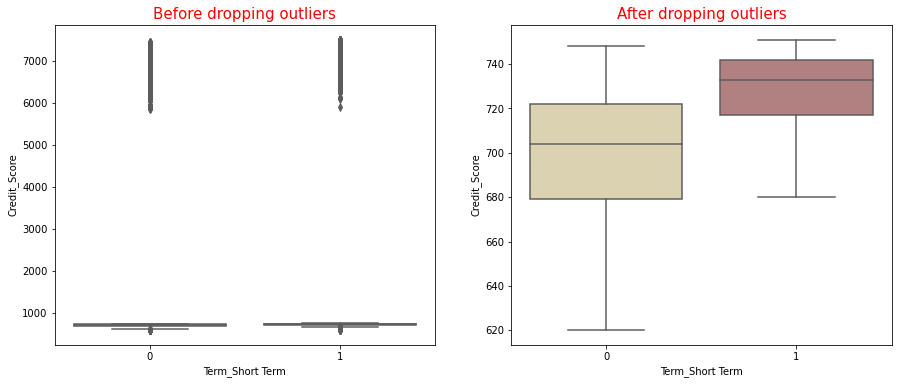

In [61]:
plt.figure(figsize = [15,20])
plt.subplot(3,2,1)
sns.boxplot(x='Term_Short Term',y='Credit_Score',
            palette='pink_r', data = bank_lone_train.sort_values('Credit_Score',ascending=False));
plt.title('Before dropping outliers',fontsize = 15 , c = 'r')

bank_lone_train = bank_lone_train.loc[bank_lone_train['Credit_Score'] <= 1500,:]
bank_lone_train = bank_lone_train.loc[bank_lone_train['Credit_Score'] >= 620 ,:]
bank_lone_train = bank_lone_train[((bank_lone_train['Credit_Score'] >= 680 )
                                   & (bank_lone_train['Term_Short Term']==1))| 
                                  (bank_lone_train['Term_Short Term']==0)]

plt.subplot(3,2,2)
sns.boxplot(x='Term_Short Term',y='Credit_Score',
            palette='pink_r', data = bank_lone_train.sort_values('Credit_Score',ascending=False));
plt.title('After dropping outliers',fontsize = 15 , c = 'r');

In [62]:
# bank_lone_val = bank_lone_val.loc[bank_lone_val['Credit_Score'] <= 1500,:]
# bank_lone_val = bank_lone_val.loc[bank_lone_val['Credit_Score'] >= 620 ,:]
# bank_lone_val = bank_lone_val[((bank_lone_val['Credit_Score'] >= 680 )
#                                    & (bank_lone_val['Term_Short Term']==1))| 
#                                   (bank_lone_val['Term_Short Term']==0)]

In [63]:
bank_lone_test = bank_lone_test.loc[bank_lone_test['Credit_Score'] <= 1500,:]
bank_lone_test = bank_lone_test.loc[bank_lone_test['Credit_Score'] >= 620 ,:]
bank_lone_test = bank_lone_test[((bank_lone_test['Credit_Score'] >= 680 )
                                   & (bank_lone_test['Term_Short Term']==1))| 
                                  (bank_lone_test['Term_Short Term']==0)]

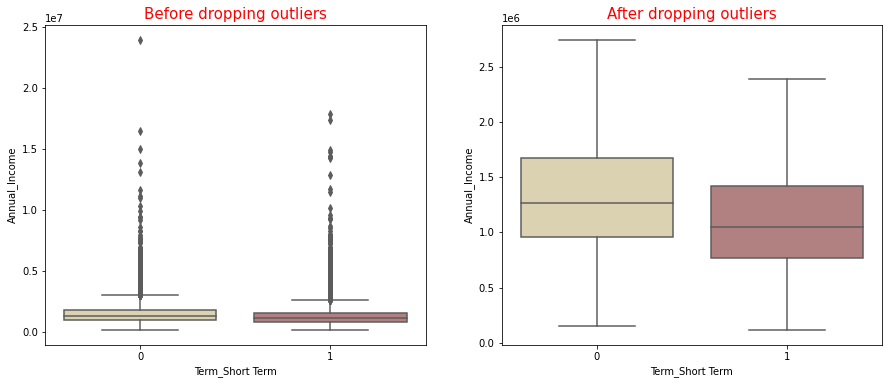

In [64]:
plt.figure(figsize = [15,20])
plt.subplot(3,2,1)
sns.boxplot(x='Term_Short Term',y='Annual_Income',
            palette='pink_r', data = bank_lone_train.sort_values('Annual_Income',ascending=False));
plt.title('Before dropping outliers',fontsize = 15 , c = 'r')

bank_lone_train = bank_lone_train.loc[bank_lone_train['Annual_Income'] <= 2750000,:]
bank_lone_train = bank_lone_train[((bank_lone_train['Annual_Income'] <= 2395000 )
                                   & (bank_lone_train['Term_Short Term']==1))
                                  | (bank_lone_train['Term_Short Term']==0)]

plt.subplot(3,2,2)
sns.boxplot(x='Term_Short Term',y='Annual_Income',
            palette='pink_r', data = bank_lone_train.sort_values('Annual_Income',ascending=False));
plt.title('After dropping outliers',fontsize = 15 , c = 'r');

In [65]:
# bank_lone_val = bank_lone_val.loc[bank_lone_val['Annual_Income'] <= 2750000,:]
# bank_lone_val = bank_lone_val[((bank_lone_val['Annual_Income'] <= 2395000 )
#                                    & (bank_lone_val['Term_Short Term']==1))
#                                   | (bank_lone_val['Term_Short Term']==0)]

In [66]:
bank_lone_test = bank_lone_test.loc[bank_lone_test['Annual_Income'] <= 2750000,:]
bank_lone_test = bank_lone_test[((bank_lone_test['Annual_Income'] <= 2395000 )
                                   & (bank_lone_test['Term_Short Term']==1))
                                  | (bank_lone_test['Term_Short Term']==0)]

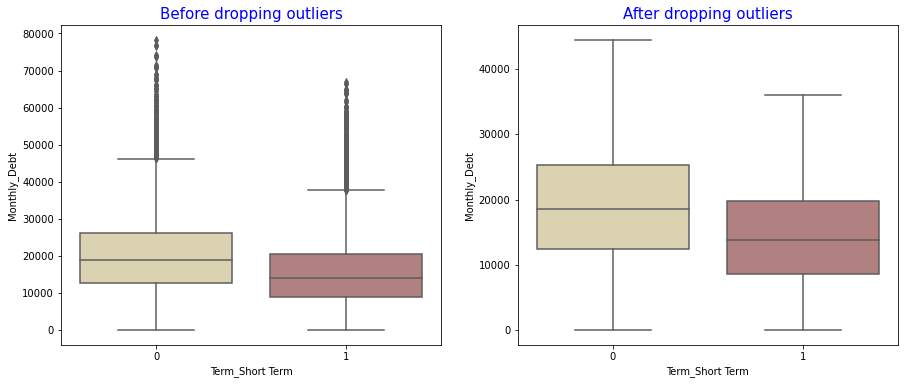

In [67]:
plt.figure(figsize = [15,20])
plt.subplot(3,2,1)
sns.boxplot(x='Term_Short Term',y='Monthly_Debt',
            palette='pink_r', data=bank_lone_train.sort_values('Monthly_Debt',ascending=False));
plt.title('Before dropping outliers',fontsize = 15 , c = 'b')

bank_lone_train = bank_lone_train.loc[bank_lone_train['Monthly_Debt'] <= 44500,:]
bank_lone_train = bank_lone_train[((bank_lone_train['Monthly_Debt'] <= 36000 )& (bank_lone_train['Term_Short Term']==1))| 
                                  (bank_lone_train['Term_Short Term']==0)]

plt.subplot(3,2,2)
sns.boxplot(x='Term_Short Term',y='Monthly_Debt',
            palette='pink_r', data=bank_lone_train.sort_values('Monthly_Debt',ascending=False));
plt.title('After dropping outliers',fontsize = 15 , c = 'b');

In [68]:
# bank_lone_val = bank_lone_val.loc[bank_lone_val['Monthly_Debt'] <= 44500,:]
# bank_lone_val = bank_lone_val[((bank_lone_val['Monthly_Debt'] <= 36000 )& 
#                                    (bank_lone_val['Term_Short Term']==1))| 
#                                   (bank_lone_val['Term_Short Term']==0)]

In [69]:
bank_lone_test = bank_lone_test.loc[bank_lone_test['Monthly_Debt'] <= 44500,:]
bank_lone_test = bank_lone_test[((bank_lone_test['Monthly_Debt'] <= 36000 )& 
                                   (bank_lone_test['Term_Short Term']==1))| 
                                  (bank_lone_test['Term_Short Term']==0)]

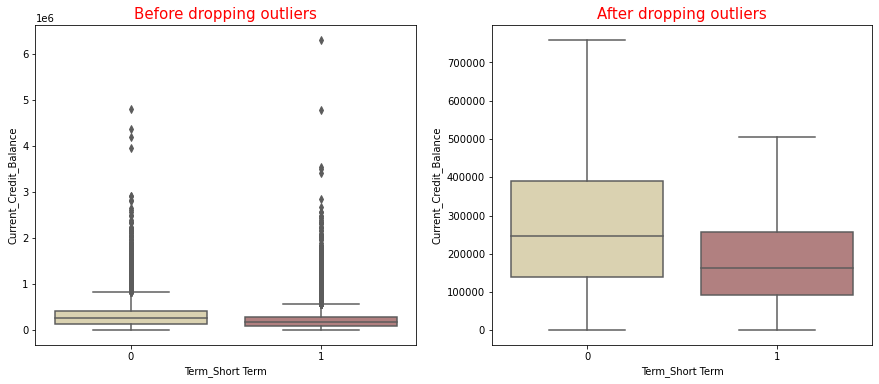

In [70]:
plt.figure(figsize = [15,20])
plt.subplot(3,2,1)
sns.boxplot(x='Term_Short Term',y='Current_Credit_Balance',
            palette='pink_r', data=bank_lone_train.sort_values('Current_Credit_Balance',ascending=False));
plt.title('Before dropping outliers',fontsize = 15 , c = 'r')

bank_lone_train = bank_lone_train.loc[bank_lone_train['Current_Credit_Balance'] <= 760000,:]
bank_lone_train = bank_lone_train[((bank_lone_train['Current_Credit_Balance'] <= 504000 )& 
                                   (bank_lone_train['Term_Short Term']==1))| (bank_lone_train['Term_Short Term']==0)]

plt.subplot(3,2,2)
sns.boxplot(x='Term_Short Term',y='Current_Credit_Balance',
            palette='pink_r', data=bank_lone_train.sort_values('Current_Credit_Balance',ascending=False));
plt.title('After dropping outliers',fontsize = 15 , c = 'r');

In [71]:
# bank_lone_val = bank_lone_val.loc[bank_lone_val['Current_Credit_Balance'] <= 760000,:]
# bank_lone_val = bank_lone_val[((bank_lone_val['Current_Credit_Balance'] <= 504000 )& 
#                                    (bank_lone_val['Term_Short Term']==1))| 
#                                   (bank_lone_val['Term_Short Term']==0)]

In [72]:
bank_lone_test = bank_lone_test.loc[bank_lone_test['Current_Credit_Balance'] <= 760000,:]
bank_lone_test = bank_lone_test[((bank_lone_test['Current_Credit_Balance'] <= 504000 )& 
                                   (bank_lone_test['Term_Short Term']==1))| 
                                  (bank_lone_test['Term_Short Term']==0)]

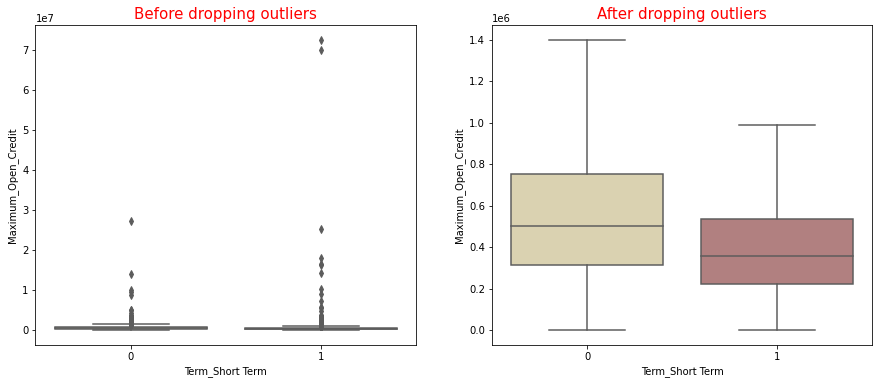

In [73]:
plt.figure(figsize = [15,20])
plt.subplot(3,2,1)
sns.boxplot(x='Term_Short Term',y='Maximum_Open_Credit',
            palette='pink_r', data=bank_lone_train.sort_values('Maximum_Open_Credit',ascending=False));
plt.title('Before dropping outliers',fontsize = 15 , c = 'r')

bank_lone_train = bank_lone_train.loc[bank_lone_train['Maximum_Open_Credit'] <= 1400000,:]
bank_lone_train = bank_lone_train[((bank_lone_train['Maximum_Open_Credit'] <= 990000 )& 
                                   (bank_lone_train['Term_Short Term']==1))| (bank_lone_train['Term_Short Term']==0)]

plt.subplot(3,2,2)
sns.boxplot(x='Term_Short Term',y='Maximum_Open_Credit',
            palette='pink_r', data=bank_lone_train.sort_values('Maximum_Open_Credit',ascending=False));
plt.title('After dropping outliers',fontsize = 15 , c = 'r');

In [74]:
# bank_lone_val = bank_lone_val.loc[bank_lone_val['Maximum_Open_Credit'] <= 1400000,:]
# bank_lone_val = bank_lone_val[((bank_lone_val['Maximum_Open_Credit'] <= 990000 )& 
#                                    (bank_lone_val['Term_Short Term']==1))| 
#                                   (bank_lone_val['Term_Short Term']==0)]



In [75]:
bank_lone_test = bank_lone_test.loc[bank_lone_test['Maximum_Open_Credit'] <= 1400000,:]
bank_lone_test = bank_lone_test[((bank_lone_test['Maximum_Open_Credit'] <= 990000 )& 
                                   (bank_lone_test['Term_Short Term']==1))| 
                                  (bank_lone_test['Term_Short Term']==0)]

### plot the correlation after one hot coding

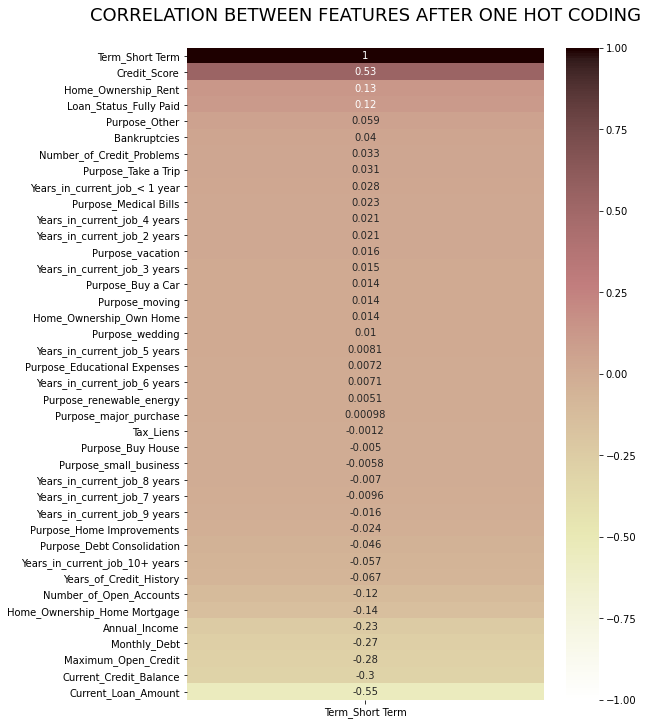

In [78]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(bank_lone_train.corr()[
    ['Term_Short Term']].sort_values(by='Term_Short Term',ascending=False),
                      vmin=-1, vmax=1, annot=True,
                      cmap = 'pink_r')
plt.title('CORRELATION BETWEEN FEATURES AFTER ONE HOT CODING\n', loc='center', fontsize=18);

In [79]:
X_train = bank_lone_train.drop(['Term_Short Term','Loan_ID','Customer_ID',
                                'Credit_Score', 'Years_of_Credit_History', 
                                'Number_of_Credit_Problems', 'Number_of_Open_Accounts',
                                'Bankruptcies'], axis = 1)
y_train = bank_lone_train['Term_Short Term']
X_test = bank_lone_test.drop(['Term_Short Term','Loan_ID','Customer_ID',
                                'Credit_Score', 'Years_of_Credit_History', 
                                'Number_of_Credit_Problems', 'Number_of_Open_Accounts',
                                'Bankruptcies'], axis = 1)
y_test = bank_lone_test['Term_Short Term']

In [80]:
model = sm.OLS(y_train,X_train)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        Term_Short Term   R-squared (uncentered):                 -48.324
Model:                            OLS   Adj. R-squared (uncentered):            -48.376
Method:                 Least Squares   F-statistic:                             -941.7
Date:                Tue, 14 Dec 2021   Prob (F-statistic):                        1.00
Time:                        15:26:01   Log-Likelihood:                         -14633.
No. Observations:               32713   AIC:                                  2.933e+04
Df Residuals:                   32679   BIC:                                  2.962e+04
Df Model:                          34                                                  
Covariance Type:            nonrobust                                                  
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Current_Loan_Amount            -1.545e-06   1.69e-08    -91.578      0.000   -1.58e-06   -1.51e-06
Annual_Income                   5.935e-08   5.65e-09     10.500      0.000    4.83e-08    7.04e-08
Monthly_Debt                   -2.882e-06   3.19e-07     -9.036      0.000   -3.51e-06   -2.26e-06
Current_Credit_Balance         -5.766e-08   2.36e-08     -2.448      0.014   -1.04e-07   -1.15e-08
Maximum_Open_Credit            -7.519e-08   1.19e-08     -6.311      0.000   -9.85e-08   -5.18e-08
Tax_Liens                          0.0096      0.008      1.174      0.241      -0.006       0.026
Home_Ownership_Home Mortgage       0.9325      0.020     45.955      0.000       0.893       0.972
Home_Ownership_Own Home            0.9586      0.021     45.944      0.000       0.918       0.999
Home_Ownership_Rent                0.9762      0.020     49.223      0.000       0.937       1.015
Purpose_Buy House                  0.0469      0.032      1.455      0.146      -0.016       0.110
Purpose_Buy a Car                 -0.0315      0.025     -1.237      0.216      -0.081       0.018
Purpose_Debt Consolidation         0.1189      0.018      6.683      0.000       0.084       0.154
Purpose_Educational Expenses      -0.0339      0.070     -0.483      0.629      -0.172       0.104
Purpose_Home Improvements          0.0575      0.020      2.896      0.004       0.019       0.096
Purpose_Medical Bills              0.0450      0.027      1.651      0.099      -0.008       0.098
Purpose_Other                      0.0415      0.019      2.193      0.028       0.004       0.079
Purpose_Take a Trip                0.3823      0.031     12.244      0.000       0.321       0.444
Purpose_major_purchase            -0.0168      0.039     -0.427      0.670      -0.094       0.060
Purpose_moving                     0.0414      0.066      0.631      0.528      -0.087       0.170
Purpose_renewable_energy           0.0514      0.268      0.191      0.848      -0.475       0.577
Purpose_small_business             0.0546      0.047      1.166      0.244      -0.037       0.147
Purpose_vacation                   0.0729      0.078      0.937      0.349      -0.080       0.225
Purpose_wedding                    0.1790      0.065      2.767      0.006       0.052       0.306
Loan_Status_Fully Paid             0.0886      0.005     17.738      0.000       0.079       0.098
Years_in_current_job_10+ years     0.0197      0.009      2.194      0.028       0.002       0.037
Years_in_current_job_2 years       0.0262      0.011      2.473      0.013       0.005       0.047
Years_in_current_job_3 years       0.0244      0.011      2.258      0.024       0.003       0.046
Years_in_curre

## Logistic Regression
---

In [81]:
LR = LogisticRegression(solver='liblinear')
LR.fit(X_train, y_train)
print('The accuracy for training : ',LR.score(X_train,y_train))
# print('The accuracy for validation: ',LR.score(X_val,y_val))
print('f1_score for train: ',f1_score(LR.predict(X_train), y_train))
# print('f1_score for validation: ',f1_score(LR.predict(X_val), y_val))

The accuracy for training :  0.7240546571699324
f1_score for train:  0.8063748096351429


## Balanceing Model Training - Class Weights
---

In [82]:
# class count
class_count_0, class_count_1 = bank_lone_train['Term_Short Term'].value_counts()

# Separate class
long_term_0 = bank_lone_train[bank_lone_train['Term_Short Term'] == 0]
short_term_1 = bank_lone_train[bank_lone_train['Term_Short Term'] == 1]# print the shape of the class
print('long term 0:', long_term_0.shape)
print('short term 1:', short_term_1.shape)

long term 0: (9834, 42)
short term 1: (22879, 42)


In [111]:
lr_balanced = LogisticRegression(class_weight='balanced', solver='liblinear')
lr_4x = LogisticRegression(class_weight={0 : 2, 1 : 1}, solver='liblinear')

print('Normal Logistic Regression Train F1:', f1_score(LR.predict(X_train), y_train))
print('Normal Logistic Regression Train AUC', roc_auc_score(y_train, LR.predict_proba(X_train)[:,1]))

lr_balanced.fit(X_train, y_train)
print('\nBalanced class weights Logistic Regression Train F1:', f1_score(y_train, lr_balanced.predict(X_train)))
print('Balanced class weights Logistic Regression Train AUC', roc_auc_score(y_train, lr_balanced.predict_proba(X_train)[:,1]))

lr_4x.fit(X_train, y_train)
print('\n2:1 class weights Logistic Regression Train F1:', f1_score(y_train, lr_4x.predict(X_train)))
print('2:1 class weights Logistic Regression Train AUC:', roc_auc_score(y_train, lr_4x.predict_proba(X_train)[:,1]))

Normal Logistic Regression Train F1: 0.8063748096351429
Normal Logistic Regression Train AUC 0.7098352561609655

Balanced class weights Logistic Regression Train F1: 0.6883608453369783
Balanced class weights Logistic Regression Train AUC 0.7695755440926931

2:1 class weights Logistic Regression Train F1: 0.7172291745670586
2:1 class weights Logistic Regression Train AUC: 0.7602478826744155


In [ ]:
#scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')



## KNN Model
---

In [93]:
print(X_train.shape)
print(y_train.shape)

(32713, 34)
(32713,)


In [107]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
knn.score(X_train, y_train)
# scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
# print(scores)
# print('The accur : 'scores.mean())
print('The accuracy for training : ',knn.score(X_train,y_train))
# print('The accuracy for validation: ',knn.score(X_val,y_val))
print('f1_score for train: ',f1_score(knn.predict(X_train), y_train))
# print('f1_score for validation: ',f1_score(knn.predict(X_val), y_val))

The accuracy for training :  0.8439764008192462
f1_score for train:  0.8926829268292683


In [95]:
# scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')



0.7747679933833592


## Decision Tree Classifier
---

In [96]:
Decision_Tree = DecisionTreeClassifier(max_depth = 8)
Decision_Tree.fit(X_train, y_train)
print('The accuracy for training : ',Decision_Tree.score(X_train,y_train))
# print('The accuracy for validation: ',Decision_Tree.score(X_val,y_val))
print('f1_score for train: ',f1_score(Decision_Tree.predict(X_train), y_train))
# print('f1_score for validation: ',f1_score(Decision_Tree.predict(X_val), y_val))

The accuracy for training :  0.8068963409042277
f1_score for train:  0.8724173449397128


## Random Forest Classifier
---

In [97]:
Random_Forest = ensemble.RandomForestClassifier(n_estimators = 100, random_state=1)
Random_Forest.fit(X_train, y_train)
print('The accuracy for training : ',Random_Forest.score(X_train,y_train))
# print('The accuracy for validation: ',Random_Forest.score(X_val,y_val))
print('f1_score for train: ',f1_score(Random_Forest.predict(X_train), y_train))
# print('f1_score for validation: ',f1_score(Random_Forest.predict(X_val), y_val))

The accuracy for training :  1.0
f1_score for train:  1.0


In [ ]:
# def cross_val(X_train, y_train, model):
#     # Applying k-Fold Cross Validation
#     from sklearn.model_selection import cross_val_score
#     accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
#     return accuracies.mean()

In [ ]:
# def fit_and_evaluate(model):
    
#     # Train the model
#     model.fit(X_train, y_train)
    
#     # Make predictions and evalute
#     model_pred = model.predict(X_test)
#     model_cross = cross_val(X_train, y_train, model)
    
#     # Return the performance metric
#     return model_cross

In [106]:
random = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
# Train the model
random.fit(X_train, y_train)
    
# Make predictions and evalute
model_pred = random.predict(X_test)
accuracies = cross_val_score(estimator = random, X = X_train, y = y_train, cv = 5)
print('Random Forest Performance on the test set: Cross Validation Score = %0.7f' % accuracies.mean())

Random Forest Performance on the test set: Cross Validation Score = 0.7798428


## Voting Classifer (HARD)
---

In [98]:
sv = SVC()

In [99]:
models = [('lr', LR ), ('rf', Random_Forest ), ('svc', sv )]

In [100]:
VC = VotingClassifier(estimators= models, voting='hard', n_jobs=-1)
VC.fit(X_train, y_train)
print('The accuracy for training : ',VC.score(X_train,y_train))
# print('The accuracy for validation: ',VC.score(X_val,y_val))
print('f1_score for train: ',f1_score(VC.predict(X_train), y_train))
# print('f1_score for validation: ',f1_score(VC.predict(X_val), y_val))

The accuracy for training :  0.8619509063674992
f1_score for train:  0.9066787898826252


In [ ]:
# for model_name in models:
    
#     curr_model = eval(model_name)
    
#     curr_model.fit(X_train, y_train)